# Visualization and Further Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load house price index data (assuming it exists as 'hpi_at_bdl_tract.csv')
url= 'https://www.fhfa.gov/hpi/download/annually/hpi_at_bdl_tract.csv'
hpi_data = pd.read_csv(url)

# Filter Data

hpi_dataFiltered = hpi_data[['tract', 'year', 'annual_change']]
hpi_dataFiltered.index = pd.to_datetime(hpi_dataFiltered['year']).dt.year
hpi_dataFiltered = hpi_dataFiltered[hpi_dataFiltered['annual_change'] != "."]  #remove specified missing data, NaN remains
hpi_dataFiltered['annual_change'] = hpi_dataFiltered['annual_change'].astype(float)

hpi_dataFiltered

# Load cleaned tracts data
tracts = pd.read_csv('cleaned_tracts.csv')

# Merge datasets on GEOID (tract number)
df_uncleaned = tracts.merge(hpi_dataFiltered, left_on='GEOID', right_on='tract', how='left')

# Display first few rows to confirm merge
df_uncleaned.head()



#drop missing annual_change
df = df_uncleaned.dropna(subset=['annual_change'])


In [3]:
#remember GEOID == tract
df.head()

,GEOID,STATEFP,COUNTYFP,metro_code,Hub_distance,NAME_2,NAMELSAD_2,Metro_Area,tract,year,annual_change
1,6029003305,6,29,37100.0,69691.301751,Los Angeles,Los Angeles County,Los Angeles,6.029003e+09,1987.0,6.16
2,6029003305,6,29,37100.0,69691.301751,Los Angeles,Los Angeles County,Los Angeles,6.029003e+09,1988.0,8.74
3,6029003305,6,29,37100.0,69691.301751,Los Angeles,Los Angeles County,Los Angeles,6.029003e+09,1989.0,24.20
4,6029003305,6,29,37100.0,69691.301751,Los Angeles,Los Angeles County,Los Angeles,6.029003e+09,1990.0,12.41
5,6029003305,6,29,37100.0,69691.301751,Los Angeles,Los Angeles County,Los Angeles,6.029003e+09,1991.0,1.25


now i am going to take an example with San Diego and plot with all years vs indv years

### San Diego Distance vs Change All Years

In [13]:
#subset san diego dataframe
metro_df = df[df['Metro_Area'] == 'San Diego']

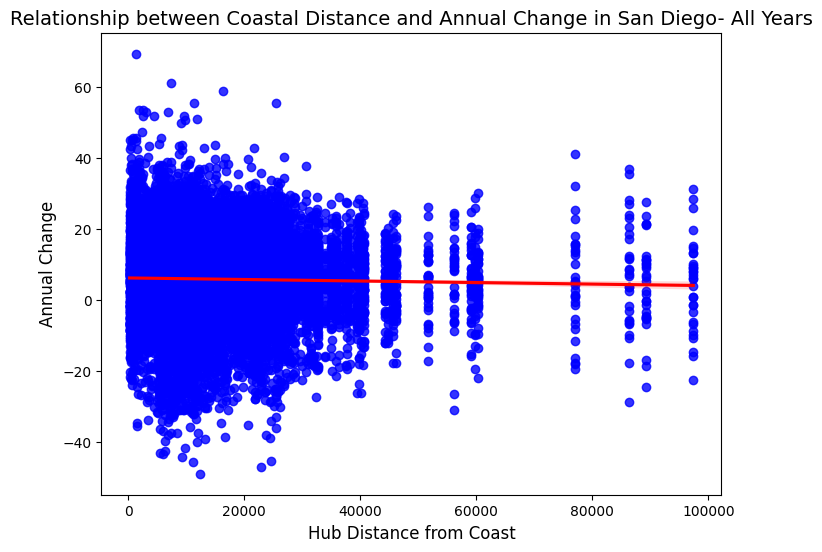

In [14]:
#plot 
plt.figure(figsize=(8, 6))
sns.regplot(x='Hub_distance', y='annual_change', data=metro_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Relationship between Coastal Distance and Annual Change in San Diego- All Years', fontsize=14)
plt.xlabel('Hub Distance from Coast', fontsize=12)
plt.ylabel('Annual Change', fontsize=12)
plt.show()

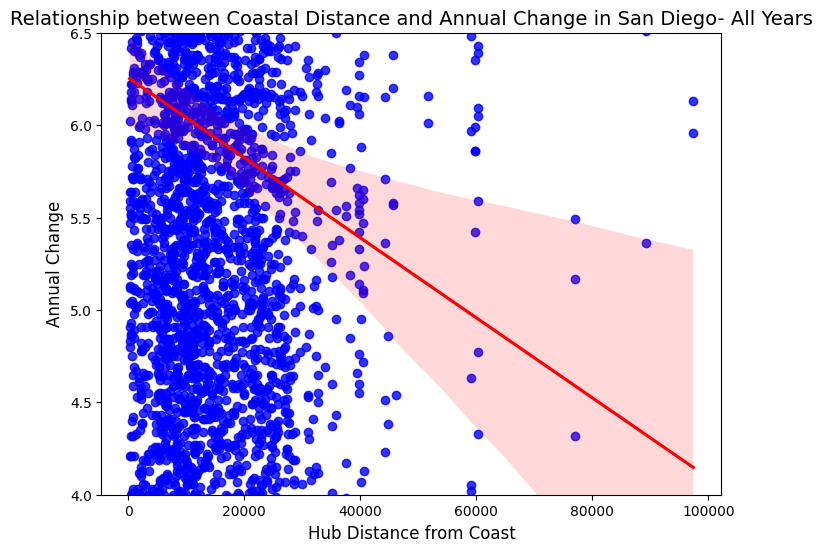

In [32]:
#plot 
plt.figure(figsize=(8, 6))
sns.regplot(x='Hub_distance', y='annual_change', data=metro_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Relationship between Coastal Distance and Annual Change in San Diego- All Years', fontsize=14)
plt.xlabel('Hub Distance from Coast', fontsize=12)
plt.ylabel('Annual Change', fontsize=12)

# Set Y-axis limits (Zooming in from 0 to 20)
plt.ylim(4, 6.5)

plt.show()

### San Diego Distance vs Change 2005

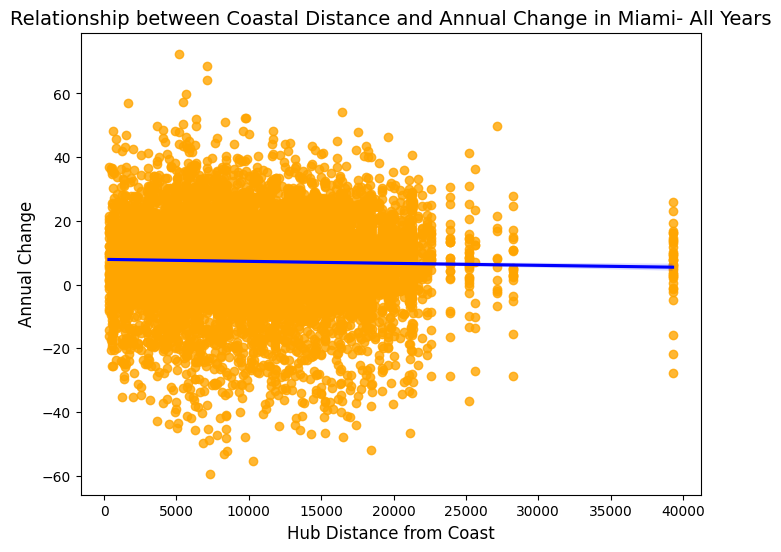

In [26]:
#let's see if miami looks more like san diego (the way we would expect it to be)
#now i want to look at the hub distance vs annual change for a city like new york
miami_df = df[df['Metro_Area'] == 'Miami']
#plot for new york
plt.figure(figsize=(8, 6))
sns.regplot(x='Hub_distance', y='annual_change', data=miami_df, scatter_kws={'color': 'orange'}, line_kws={'color': 'blue'})
plt.title(f'Relationship between Coastal Distance and Annual Change in Miami- All Years', fontsize=14)
plt.xlabel('Hub Distance from Coast', fontsize=12)
plt.ylabel('Annual Change', fontsize=12)
plt.show()

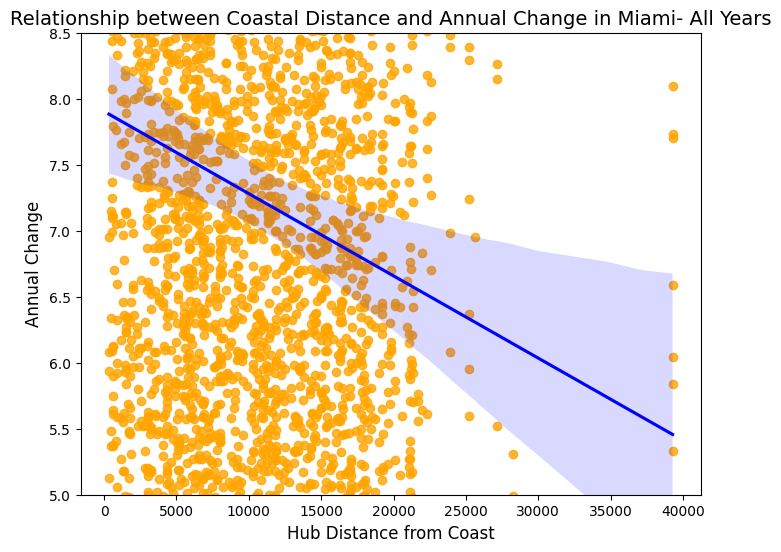

In [33]:
#let's see if miami looks more like san diego (the way we would expect it to be)
#now i want to look at the hub distance vs annual change for a city like new york
miami_df = df[df['Metro_Area'] == 'Miami']
#plot for new york
plt.figure(figsize=(8, 6))
sns.regplot(x='Hub_distance', y='annual_change', data=miami_df, scatter_kws={'color': 'orange'}, line_kws={'color': 'blue'})
plt.title(f'Relationship between Coastal Distance and Annual Change in Miami- All Years', fontsize=14)
plt.xlabel('Hub Distance from Coast', fontsize=12)
plt.ylabel('Annual Change', fontsize=12)

# Set Y-axis limits (Zooming in from 0 to 20)
plt.ylim(5, 8.5)

plt.show()
